In [21]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [22]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.75
fig_dims = (10, 4)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

fig_name = 'graph_sensitivity'

In [23]:
''' Stage Size: Load data from file. '''
csv_path = './sec7/FF.csv'
workload_list = ['8', '12', '16', '20']
fig_scheme_list = ['Baseline Read Access', 'Baseline Write Access', 'IGC Read Access', 'IGC Write Access']
workload_dict = {item: item for item in workload_list}
fig_scheme_dict = {item: item for item in fig_scheme_list}

fig_title = 'Norm. Performance'
fig_name = 'GC breakdown'
fig_path = './4.2.2/'
fig_ylim = (0, 1000)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 200))
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 0]]
design_colors = fig_bar_colors
baseline_colors = easypyplot.color.color_scale(design_colors[0], 2, 0.5, 0.75)[::-1]
igc_colors = easypyplot.color.color_scale(design_colors[1], 2, 0.5, 0.75)[::-1]
design_len = 2
assert len(fig_bar_colors) == design_len

# pprint(fig_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
baseline_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = str(int(row[0]))
    if any(workload == workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in fig_scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 2
        baseline_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(baseline_xticks)
igc_xticks = [item + fig_bar_width for item in baseline_xticks]

pprint(fig_data_2darr)

''' Layout hit rate '''
layout_scheme_list = ['Baseline GC', 'IGC GC']
layout_scheme_dict = {item: item for item in layout_scheme_list}
csv_hd = pd.read_csv(csv_path, sep=',')
layout_xlabels = []
layout_xticks = []
layout_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = str(int(row[0]))
    if any(workload == workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in layout_scheme_dict):
                row_value.append(row[col])
        layout_data_2darr.append(row_value)
        layout_xlabels.append(workload_fullname)
        xtick += 1
        layout_xticks.append(xtick)
assert len(layout_data_2darr) == len(layout_xlabels) == len(layout_xticks)

pprint(layout_data_2darr)

[[305.01, 12.84, 73.43, 11.92],
 [477.19, 35.75, 173.57, 38.21],
 [661.26, 73.59, 251.9, 64.37],
 [844.3, 0.0, 376.05, 0.0]]
[[4816.0, 1330.0], [7594.0, 2937.0], [10353.0, 4590.0], [13750.0, 6290.0]]


[ 4816.  7594. 10353. 13750.]
[ 4816.  7594. 10353. 13750.]


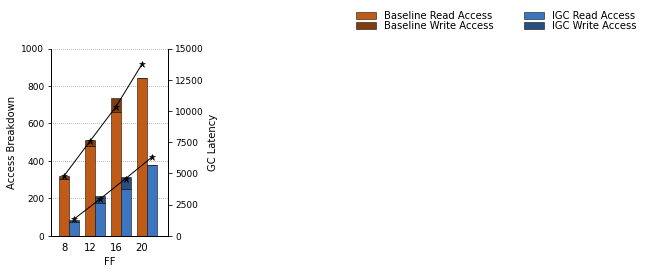

In [24]:
''' stage size plot '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
fig_ax = fig.add_subplot(1 ,4 ,1)
fig_ax2 = fig_ax.twinx()
easypyplot.format.turn_off_box(fig_ax, twinx_axes=fig_ax2)
fig_data_nparr = np.array(fig_data_2darr)
baseline_acc_data = fig_data_nparr[:, :2]
igc_acc_data = fig_data_nparr[:, 2:4]
fig_h = []
fig_h += easypyplot.barchart.draw(
    fig_ax, baseline_acc_data,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=baseline_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=baseline_colors)
fig_h += easypyplot.barchart.draw(
    fig_ax, igc_acc_data,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=igc_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=igc_colors)
fig_h2 = []
# easypyplot.format.turn_off_box(ax2)
layout_data_nparr = np.array(layout_data_2darr)
layout_xticks = [baseline_xticks, igc_xticks]
for group_id in range(design_len):
    print(layout_data_nparr[:, 0])
    fig_h2 += fig_ax2.plot(layout_xticks[group_id], layout_data_nparr[:, group_id],
                marker='*',
                linewidth = '1.0',
                color = '#000000',
                # color = baseline_colors[0],
                markersize = '7.0',
                # prop = ft
                )
''' x axis '''
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 1, fig_ax.get_xticks()[-1] + 1])
fig_ax.set_xticks(baseline_xticks)
fig_ax.set_xlim([0, len(workload_list) * design_len + 1])
fig_ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# fig_ax.tick_params(direction='in') # [in, out, inout]
fig_ax.set_xlabel('FF', fontproperties=ft)
''' y axis '''
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
fig_ax.set_ylabel('Access Breakdown', multialignment='center', fontproperties=ft)
layout_ylim = [0., 15000.]
fig_ax2.set_ylim(layout_ylim)
fig_ax2.set_yticks(list(np.arange(layout_ylim[0], layout_ylim[1]+0.01, 2500)))
fig_ax2.set_ylabel('GC Latency', multialignment='center', fontproperties=ft)
''' legend '''
legend = [fig_scheme_dict[item] for item in fig_scheme_dict]
fig.legend(fig_h, legend, loc='right', bbox_to_anchor=(0.9, 1.05),
        ncol=2, frameon=False, prop=ft, columnspacing=3, labelspacing=0)

# ''' last resize '''
# # fig.subplots_adjust(hspace=1)
plt.tight_layout(w_pad=1.5, h_pad=2.75)
easypyplot.format.resize_ax_box(fig_ax, hratio=0.8)


In [25]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures